In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../functions/')
from statistics_functions import *
sys.path.insert(1, '../../lkf_tools/lkf_tools/')
from dataset import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})
import warnings
warnings.filterwarnings('ignore')

In [2]:
res = '4km'

path = '/work/bk1377/a270230/'
path_stat = path + 'statistics/'
path_ds = path + f'datasets/{res}/'

In [3]:
# load mean ice concentration, total ice covered area, mean ice thickness,
# and total ice volume for all years of the model run (1986 - 2100 for 4km,
# 2013 - 2020 & 2093 - 2100 for 1km)
a_mean, area_total, h_mean, ice_vol_total, years_all = np.load(
    path_stat + f'a_mean_tot_h_mean_tot_{res}.npy', allow_pickle=True)

# make an array of the right np.shape out of area_total
arr = np.zeros((len(area_total),365))
for year, area_total_year in enumerate(area_total):
    arr[year,:] = area_total_year
area_total = arr

In [4]:
# select the years you want to analyze
years = [i for i in range(2013,2021)]
years += [i for i in range(2093,2101)]

# only use the selected years
inds = [np.where(years_all==year)[0][0] for year in years]
area_total = area_total[inds]

In [5]:
# load mean ice concentration, total ice covered area, mean ice thickness,
# and total ice volume for all years of the model run (1986 - 2100 for 4km,
# 2013 - 2020 & 2093 - 2100 for 1km)
data = np.load(path_stat + f'lkfs_paths_{res}.npz', allow_pickle=True)
years, lkfs, paths, paths_all = [data[key] for key in data.files]

# use already calculated resolutions (can be calculated either from the nc files like in
# plot/area_thickness.ipynb, or from the lkf_data objects like in statistics_main.ipynb)
if res == '4km': res_km = 4.337849218906646
if res == '1km': res_km = 1.083648783567869

In [6]:
# calculate metrics
n_lkfs = get_n_lkfs(lkfs)
rho_lkfs = n_lkfs / area_total * 10000
length, mean_length, total_length = get_lkf_length(lkfs, res_km)

In [7]:
def mm(var):
    ''' calculate the monthly mean values 
    of the LKF metrics
    '''
    monthly_mean = []
    for n_lkfs_y in var:

        monthly_mean_y = []
        for i in range(12):

            months = np.append(np.array([0]), xticks)
            startday = months[i]
            endday = months[i+1]
            monthly_mean_y += np.sum(n_lkfs_y[startday:endday]) / (endday - startday),

        monthly_mean += monthly_mean_y,
    
    return monthly_mean

def plot(var, name, ylim):
    '''use this to check whether there is a trend within a decade.
    try out [::2] to bette visulize it or just plot the
    beginning, middle and end year
    '''
    
    for i, data in enumerate(var):
        plt.plot(xticks_minor, data, label=i)

    plt.ylim([0,ylim])
    plt.ylabel(name)
    plt.xlim([0,365])
    plt.xticks(xticks,[])
    plt.xticks(xticks_minor,xticks_labels, rotation=70, minor=True)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.grid()

In [8]:
n_lkfs_m = mm(n_lkfs)
rho_lkfs_m = mm(rho_lkfs)
av_length_m = mm(mean_length)
total_length_m = mm(total_length)

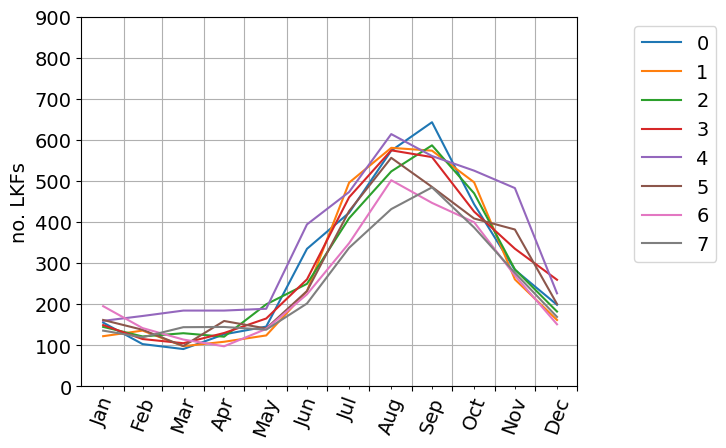

In [9]:
plot(n_lkfs_m[:8], 'no. LKFs', 900)

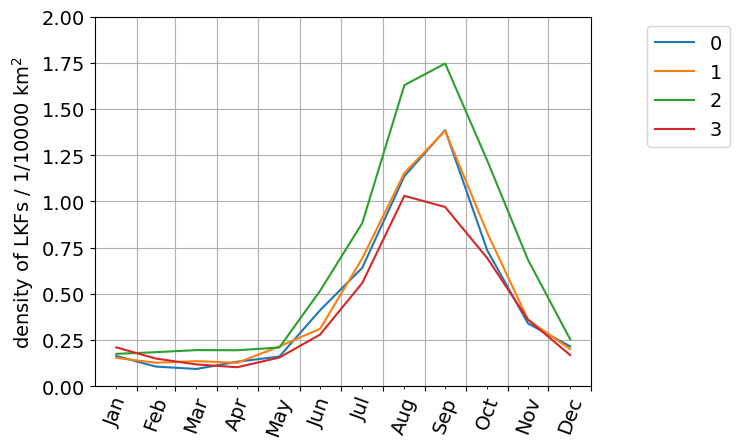

In [10]:
plot(rho_lkfs_m[:8][::2], r'density of LKFs / 1/10000 km$^2$', 2)

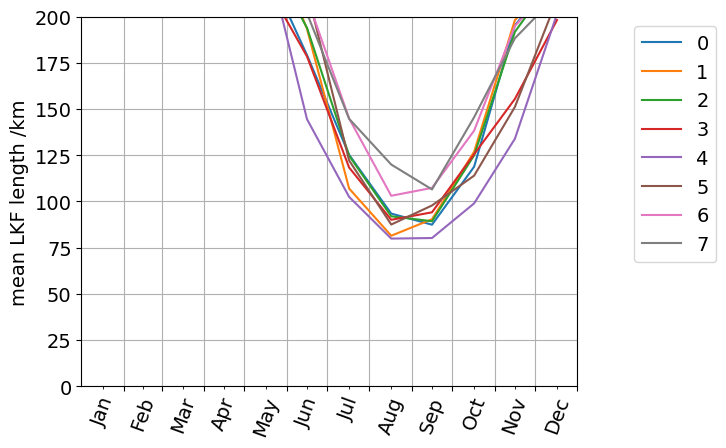

In [11]:
plot(av_length_m[:8], 'mean LKF length /km', 200)

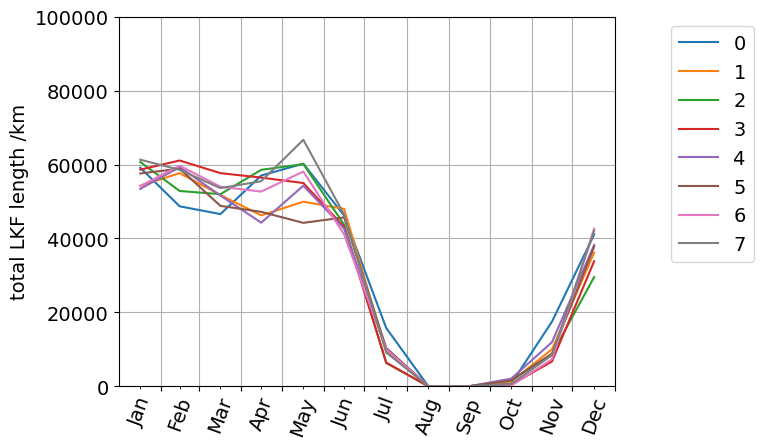

In [12]:
plot(total_length_m[8:], 'total LKF length /km', 100000)